In [1]:
from selenium import webdriver

# 에러가 뜨면 selenium이 설치가 안된 상태이다.
# pip install selenium 으로 설치한다.

<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobi
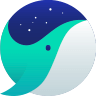
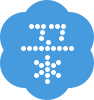

In [2]:
driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')

url = 'https://www.naver.com/'
driver.get(url)

html = driver.page_source

print(html)

In [12]:
from bs4 import BeautifulSoup

html = '''
<html>
    <head>
    </head>
    <body>
        <h1>우리동네시장</h1>
            <div class='sale'>
                <p id='fruits1' class='fruits'>
                    <span class='name'>바나나</span>
                    <span class='price'>3000원</span>
                    <span class='inventory'>500개</span>
                    <span class='store'>가나다상회</span>
                    <a href='http://bit.ly/forPlaywithData'>홈페이지</a>
                </p>
            </div>
            <div class='prepare'>
                <p id='fruits2' class='fruits'>
                    <span class='name'>파인애플</span>
                </p>
            </div>
     </body>
</html>     
'''

soup = BeautifulSoup(html, 'html.parser')

In [13]:
tags_span = soup.select('span')
tags_p = soup.select('p')

In [14]:
ids_fruits1 = soup.select('#fruits1')
class_price = soup.select('.price')
tags_span_class_price = soup.select('span.price')

In [15]:
tags_name = soup.select('span.name')

print(tags_name)

[<span class="name">바나나</span>, <span class="name">파인애플</span>]


In [16]:
tags_banana1 = soup.select('#fruits1 > span.name')
print(tags_banana1)

[<span class="name">바나나</span>]


In [17]:
tags_banana2 = soup.select('div.sale > #fruits1 > span.name')
tags_banana3 = soup.select('div.sale span.name')

print(tags_banana2)
print(tags_banana3)

[<span class="name">바나나</span>]
[<span class="name">바나나</span>]


In [18]:
tags = soup.select('span.name')

for tag in tags:
    print(tag)

<span class="name">바나나</span>
<span class="name">파인애플</span>


In [20]:
tags = soup.select('a')
tag = tags[0]
content = tag.text
print(content)

link = tag['href']
print(link)

홈페이지
http://bit.ly/forPlaywithData


In [30]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')

url = 'https://www.melon.com/chart/index.htm'

driver.get(url)

html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')

songs = soup.select('table > tbody > tr')

print(len(songs))
print(songs[0])

100
<tr data-song-no="33077590">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="VVS (Feat. JUSTHIS) (Prod. GroovyRoom) 곡 선택" type="checkbox" value="33077590"/></div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('10521601');" title="쇼미더머니 9 Episode 1">
<img alt="쇼미더머니 9 Episode 1 - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/105/21/601/10521601_20201120125511_500.jpg/melon/resize/120/quality/80/optimize" width="60"/>
<span class="bg_album_frame"></span>
</a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('33077590');" title="VVS (Feat. JUSTHIS) (Prod. GroovyRoom) 곡정보"><span class="none">곡정보</span></a>
</div></td>
<td><div class="wrap">
<div class="wrap_song_info">
<div class="ellipsis rank01"><span>
<a href="javascript:melon.play.playSong('19030101',33077590);" t

In [32]:
song = songs[0]

title = song.select('a')
len(title)

16

In [33]:
title = song.select('span > a')
len(title)

5

In [34]:
title = song.select('div.ellipsis.rank01 > span > a')
len(title)

1

In [35]:
title = song.select('div.ellipsis.rank01 > span > a')[0].text
title

'VVS (Feat. JUSTHIS) (Prod. GroovyRoom)'

In [36]:
singer = song.select('div.ellipsis.rank02 > a')
len(singer)

4

In [37]:
singer = song.select('div.ellipsis.rank02 > a')[0].text
singer

'미란이 (Mirani)'

In [38]:
# 멜론 100위 노래순위 정보 가져오기
for song in songs:
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = '|')

VVS (Feat. JUSTHIS) (Prod. GroovyRoom)|미란이 (Mirani)
내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))|릴보이 (lIlBOI)
Dynamite|방탄소년단
잠이 오질 않네요|장범준
힘든 건 사랑이 아니다|임창정
Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom)|미란이 (Mirani)
밤하늘의 별을(2020)|경서
Life Goes On|방탄소년단
Lovesick Girls|BLACKPINK
취기를 빌려 (취향저격 그녀 X 산들)|산들
Freak (Prod. Slom)|릴보이 (lIlBOI)
뿌리 (Feat. JUSTHIS) (Prod. GroovyRoom)|Khundi Panda
오래된 노래|스탠딩 에그
Savage Love (Laxed - Siren Beat) (BTS Remix)|Jawsh 685
All I Want For Christmas Is You|Mariah Carey
내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)|규현 (KYUHYUN)
DON'T TOUCH ME|환불원정대
딩가딩가 (Dingga)|마마무 (Mamamoo)
When We Disco (Duet with 선미)|박진영
적외선 카메라|원슈타인
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지|AKMU (악동뮤지션)
어김없이 이 거리에|정승환
나랑 같이 걸을래 (바른연애 길잡이 X 적재)|적재
에잇(Prod.&Feat. SUGA of BTS)|아이유
흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야|장범준
뻔한남자|이승기
Santa Tell Me|Ariana Grande
How You Like That|BLACKPINK
I CAN’T STOP ME|TWICE (트와이스)
어떻게 지내 (Prod. By VAN.C)|오반
늦은 밤 너의 집 앞 골목길에서|노을
혼술하고 싶은 밤|벤
원해 (Feat. 팔로알토) (Prod. 코드 쿤스트)|스윙스
Dolphin|오마이걸 (OH MY GIRL)
가을밤에 든 생각|잔나비


In [39]:
driver = webdriver.Chrome('/Users/mac/desktop/python/DataAnalysis/chromedriver')
url = 'https://www.melon.com/chart/index.htm'
driver.get(url)

songs = driver.find_elements_by_css_selector('table > tbody > tr')
for song in songs:
    title = song.find_elements_by_css_selector('div.ellipsis.rank01 > span > a')[0].text
    singer = song.find_elements_by_css_selector('div.ellipsis.rank02 > a')[0].text
    print(title, singer, sep = '|')

VVS (Feat. JUSTHIS) (Prod. GroovyRoom)|미란이 (Mirani)
내일이 오면 (Feat. 기리보이, BIG Naughty (서동현))|릴보이 (lIlBOI)
Dynamite|방탄소년단
잠이 오질 않네요|장범준
힘든 건 사랑이 아니다|임창정
Achoo (Feat. pH-1, HAON) (Prod. GroovyRoom)|미란이 (Mirani)
밤하늘의 별을(2020)|경서
Life Goes On|방탄소년단
Lovesick Girls|BLACKPINK
취기를 빌려 (취향저격 그녀 X 산들)|산들
Freak (Prod. Slom)|릴보이 (lIlBOI)
뿌리 (Feat. JUSTHIS) (Prod. GroovyRoom)|Khundi Panda
오래된 노래|스탠딩 에그
Savage Love (Laxed - Siren Beat) (BTS Remix)|Jawsh 685
All I Want For Christmas Is You|Mariah Carey
내 마음이 움찔했던 순간 (취향저격 그녀 X 규현)|규현 (KYUHYUN)
DON'T TOUCH ME|환불원정대
딩가딩가 (Dingga)|마마무 (Mamamoo)
When We Disco (Duet with 선미)|박진영
적외선 카메라|원슈타인
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지|AKMU (악동뮤지션)
어김없이 이 거리에|정승환
나랑 같이 걸을래 (바른연애 길잡이 X 적재)|적재
에잇(Prod.&Feat. SUGA of BTS)|아이유
흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야|장범준
뻔한남자|이승기
Santa Tell Me|Ariana Grande
How You Like That|BLACKPINK
I CAN’T STOP ME|TWICE (트와이스)
어떻게 지내 (Prod. By VAN.C)|오반
늦은 밤 너의 집 앞 골목길에서|노을
혼술하고 싶은 밤|벤
원해 (Feat. 팔로알토) (Prod. 코드 쿤스트)|스윙스
Dolphin|오마이걸 (OH MY GIRL)
가을밤에 든 생각|잔나비
